In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import style
style.use('dark_background')

In [29]:
train=pd.read_excel("Data_Train.xlsx")

In [30]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

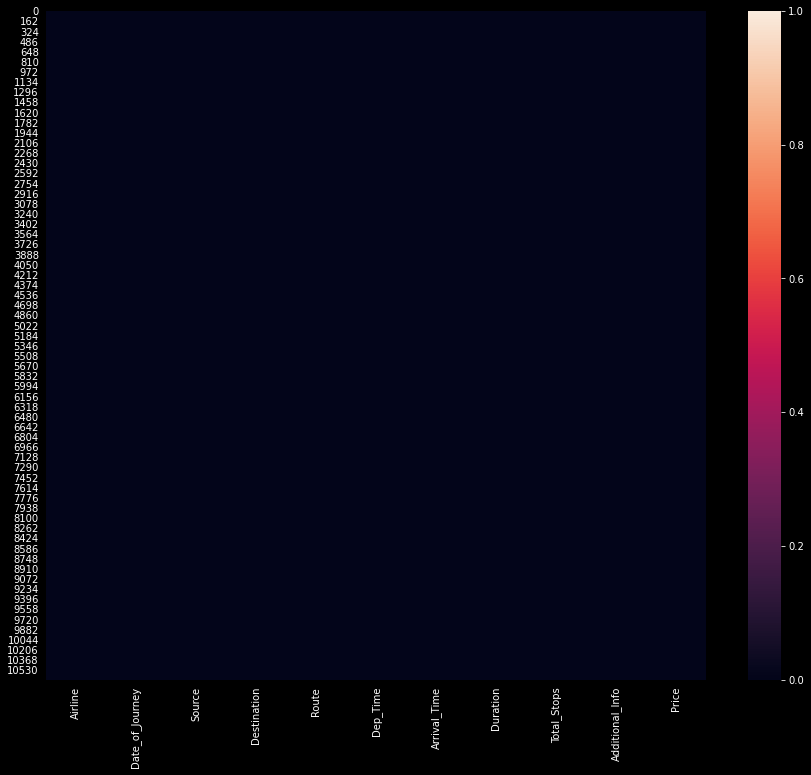

In [7]:
sns.set({'figure.figsize':(14.8,12.3)})
style.use('dark_background')
sns.heatmap(train.isnull())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

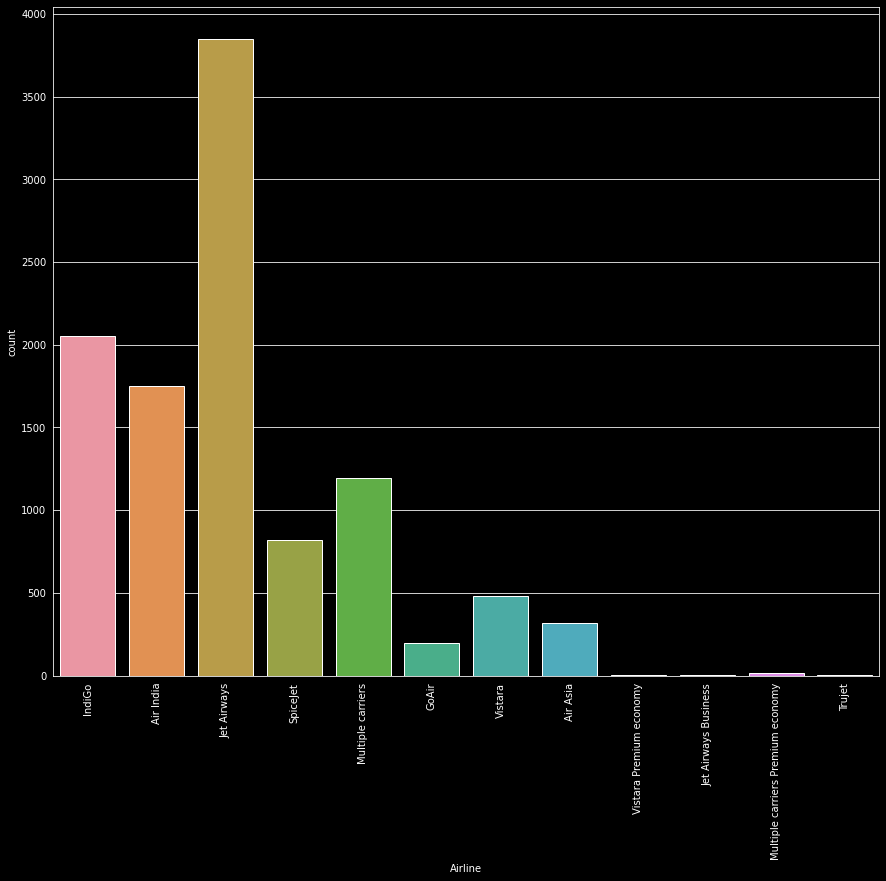

In [8]:
sns.countplot(x='Airline',data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

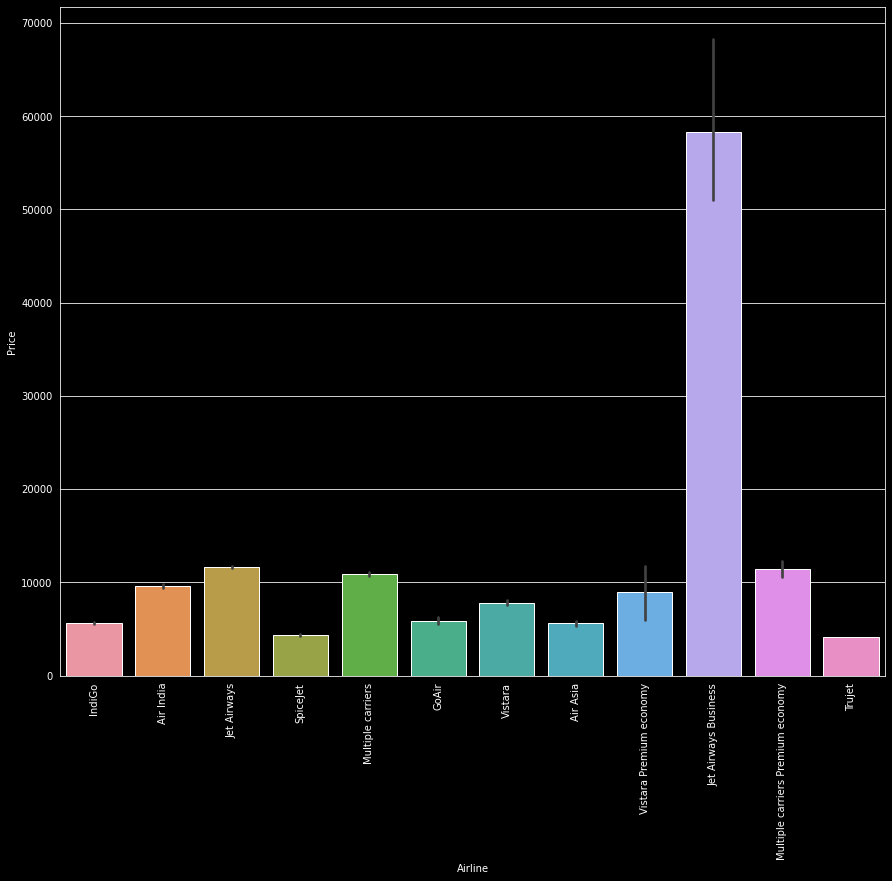

In [9]:
sns.barplot(x='Airline',y='Price',data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

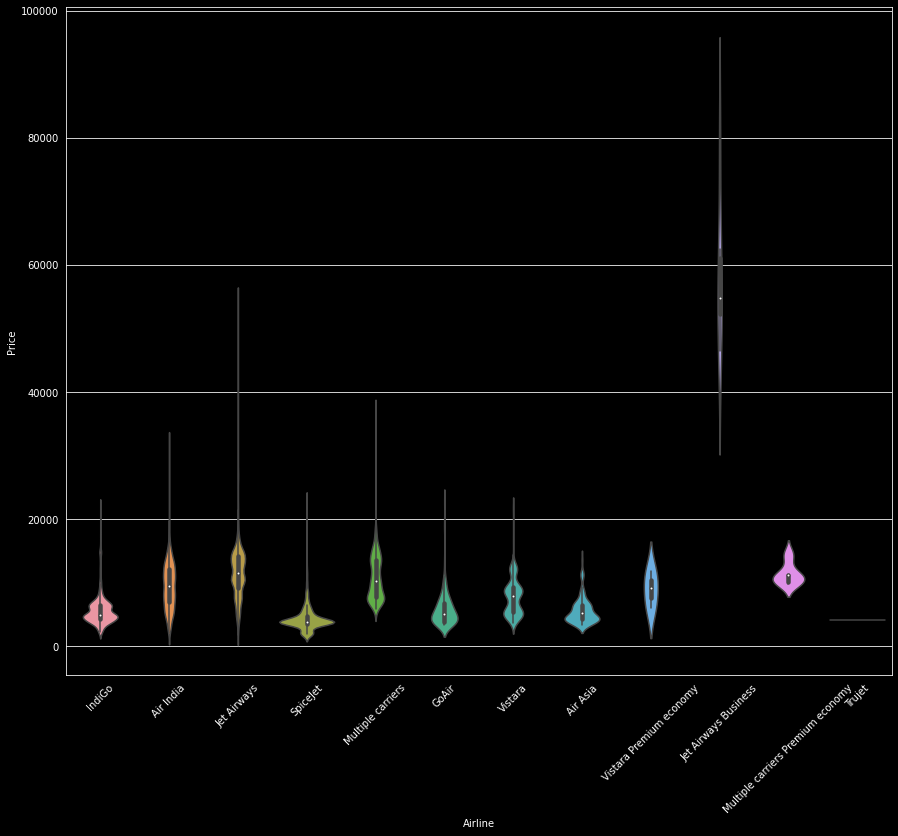

In [10]:
sns.violinplot(x="Airline",y="Price",data=train)
plt.xticks(rotation = 45)

In [11]:
train["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [12]:
train["Additional_Info"].replace("No Info","No info" ,inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

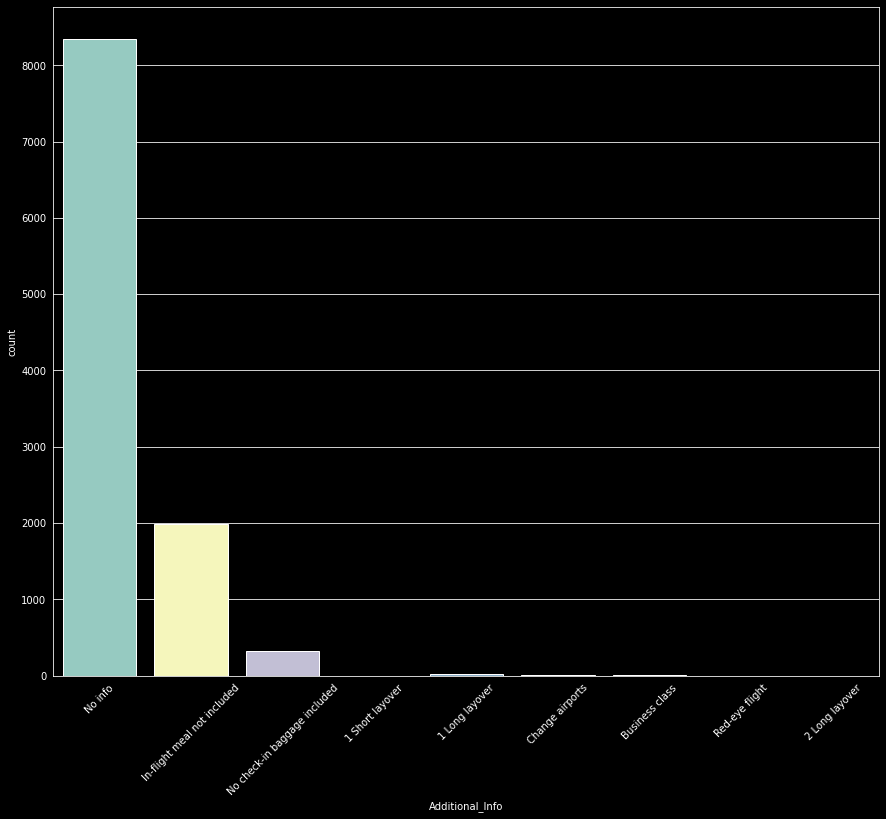

In [13]:
sns.countplot(x="Additional_Info",data=train)
plt.xticks(rotation=45)

In [14]:
train["Dep_Time"].dtype

dtype('O')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

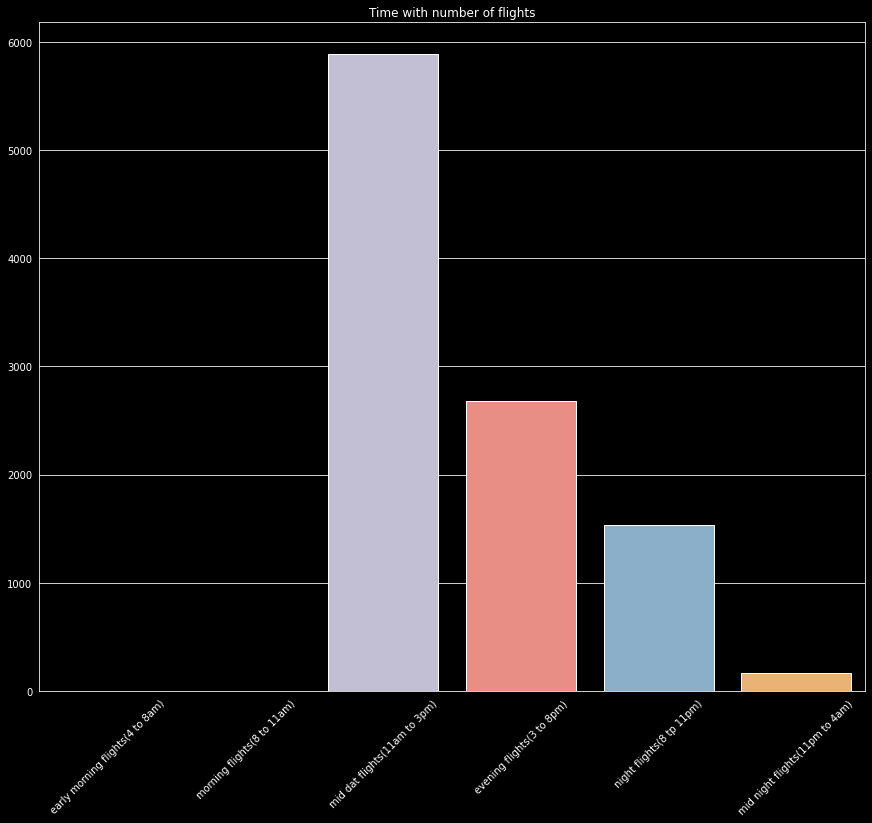

In [15]:
time=train["Dep_Time"].str.split(':').str[0].astype(str)
min=train["Dep_Time"].str.split(':').str[1].astype(str)
train['new']=time+min
train["new"]=pd.to_numeric(train["new"])

time_earlyM=train[((train["new"]>=4000) & (train["new"]<=8000))]
time_morning=train[((train.new <= 800) & (train.new >= 1100))]
time_midDay=train[((train["new"]>=1100) & (train["new"]<=150000))]
time_evening=train[((train["new"]>=1500) & (train["new"]<=2000))]
time_night=train[((train["new"]>=2000) & (train["new"]<=2300))]
time_midNight=train[((train["new"]>=2300) & (train["new"]<=4000))]

x=["early morning flights(4 to 8am)","morning flights(8 to 11am)","mid dat flights(11am to 3pm)","evening flights(3 to 8pm)","night flights(8 tp 11pm)","mid night flights(11pm to 4am)"]
y=[len(time_earlyM),len(time_morning),len(time_midDay),len(time_evening),len(time_night),len(time_midNight)]

plt.title("Time with number of flights")
sns.barplot(x=x,y=y)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

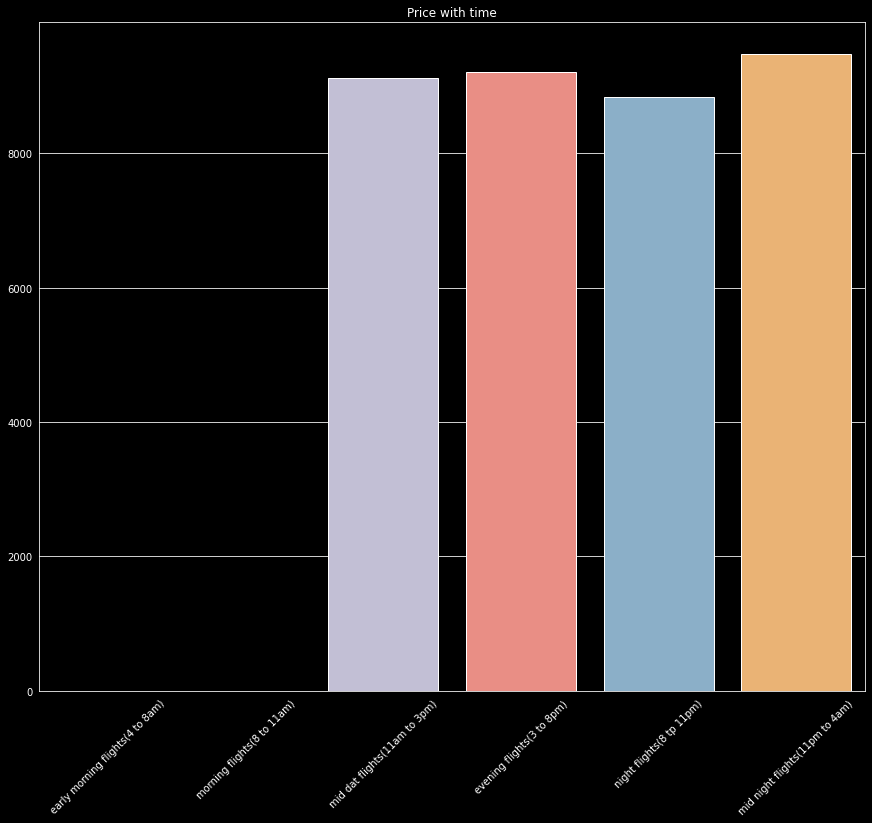

In [16]:
time_earlyM=train["Price"][((train["new"]>=4000) & (train["new"]<=8000))]
time_morning=train["Price"][((train.new <= 800) & (train.new >= 1100))]
time_midDay=train["Price"][((train["new"]>=1100) & (train["new"]<=150000))]
time_evening=train["Price"][((train["new"]>=1500) & (train["new"]<=2000))]
time_night=train["Price"][((train["new"]>=2000) & (train["new"]<=2300))]
time_midNight=train["Price"][((train["new"]>=2300) & (train["new"]<=4000))]

x=["early morning flights(4 to 8am)","morning flights(8 to 11am)","mid dat flights(11am to 3pm)","evening flights(3 to 8pm)","night flights(8 tp 11pm)","mid night flights(11pm to 4am)"]
y=[np.mean(time_earlyM),np.mean(time_morning),np.mean(time_midDay),np.mean(time_evening),np.mean(time_night),np.mean(time_midNight)]

plt.title("Price with time")
sns.barplot(x=x,y=y)
plt.xticks(rotation=45)

In [17]:
train['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

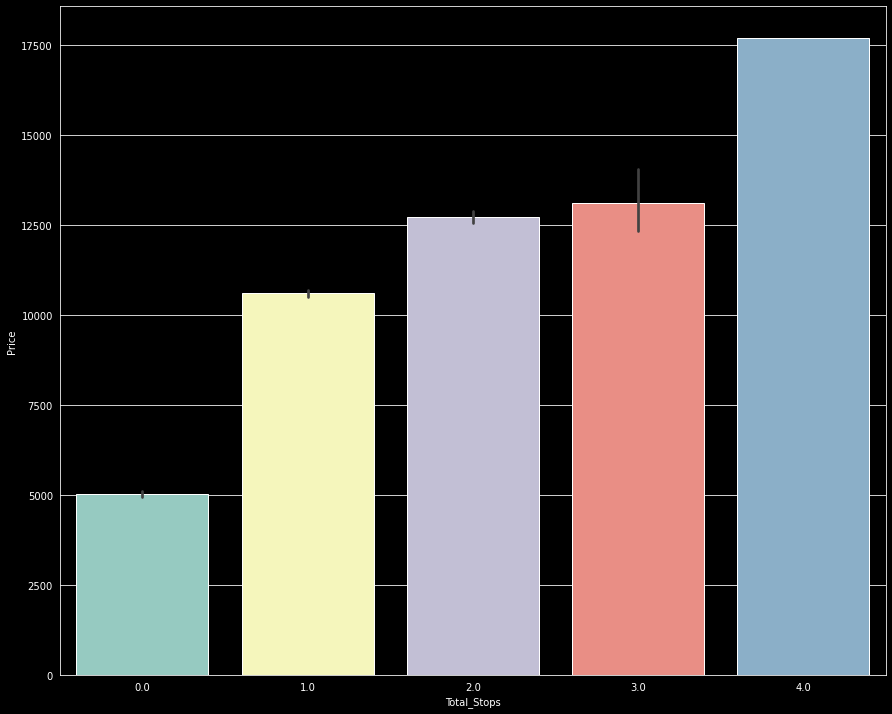

In [18]:
sns.barplot(x='Total_Stops',y="Price",data=train)

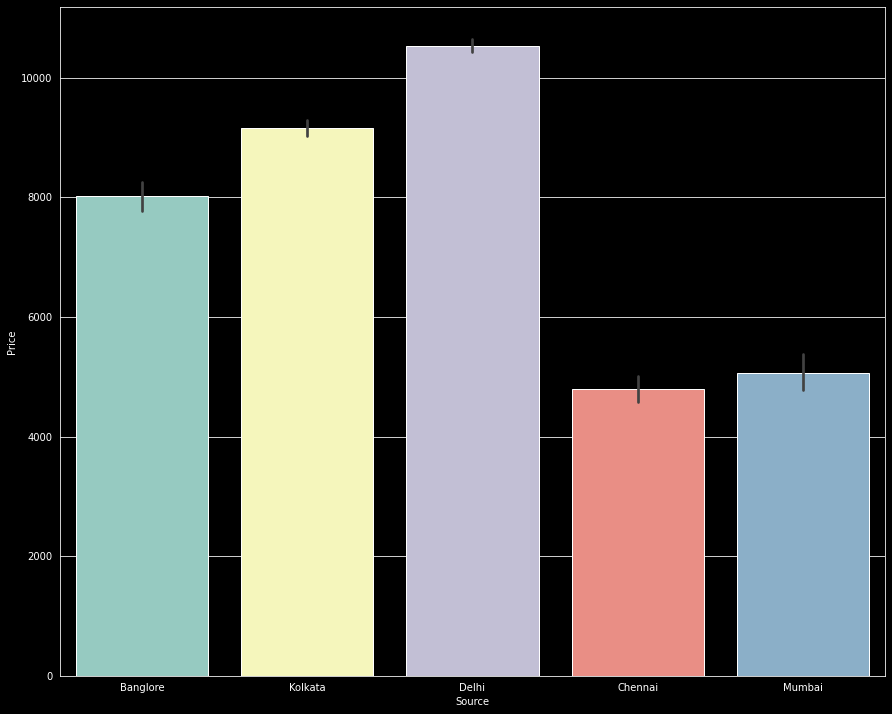

In [19]:
sns.barplot(x='Source',y="Price",data=train)

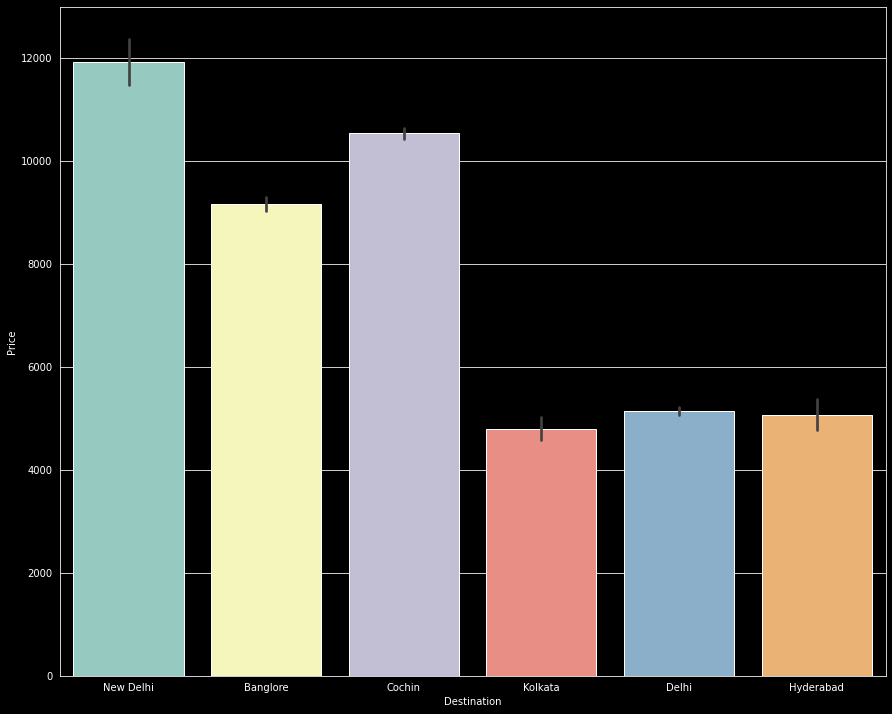

In [20]:
sns.barplot(x='Destination',y="Price",data=train)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

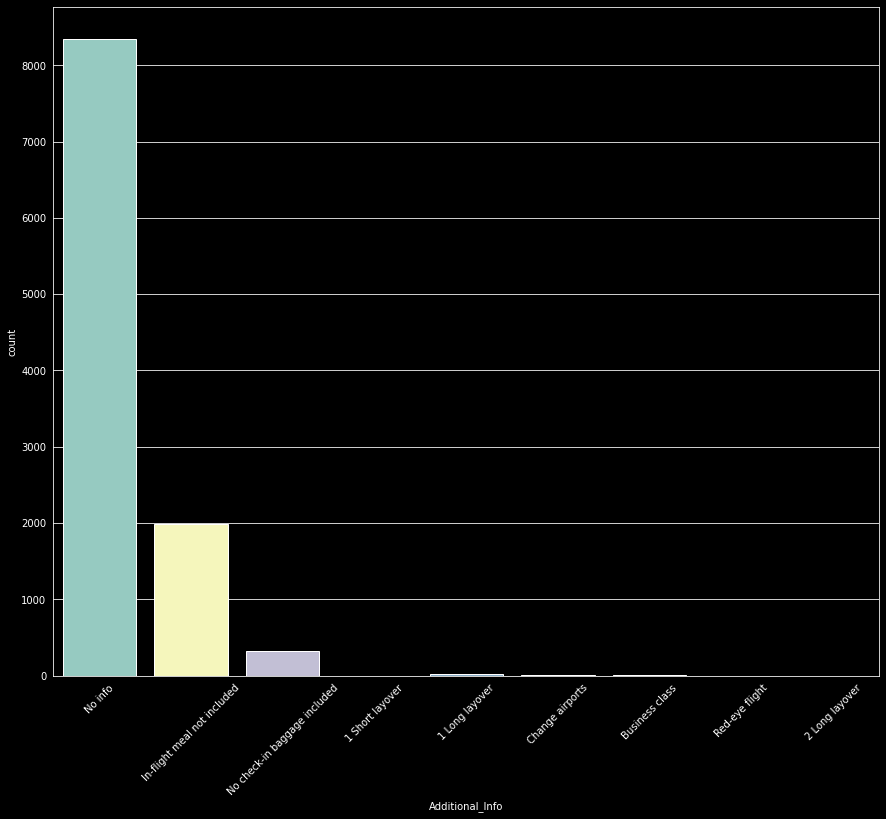

In [21]:
sns.countplot(x="Additional_Info",data=train)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

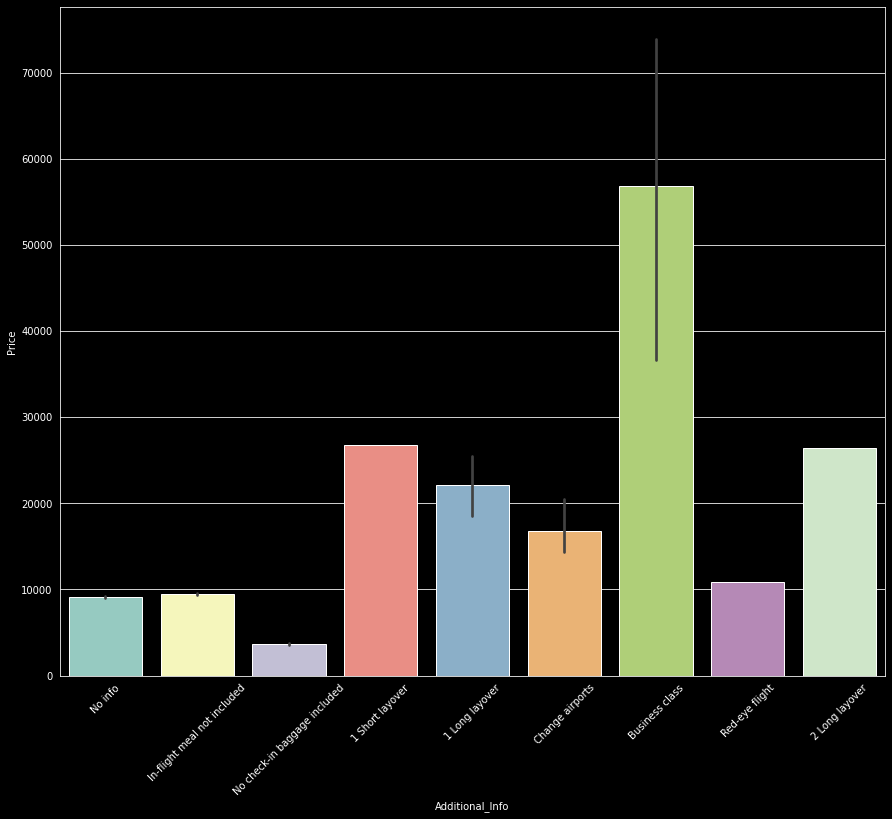

In [22]:
sns.barplot(x="Additional_Info",y="Price",data=train)
plt.xticks(rotation=45)

In [31]:
train['Duration']= train['Duration'].str.replace("h", '*1').str.replace(' ','+').str.replace('m','//60').apply(eval)

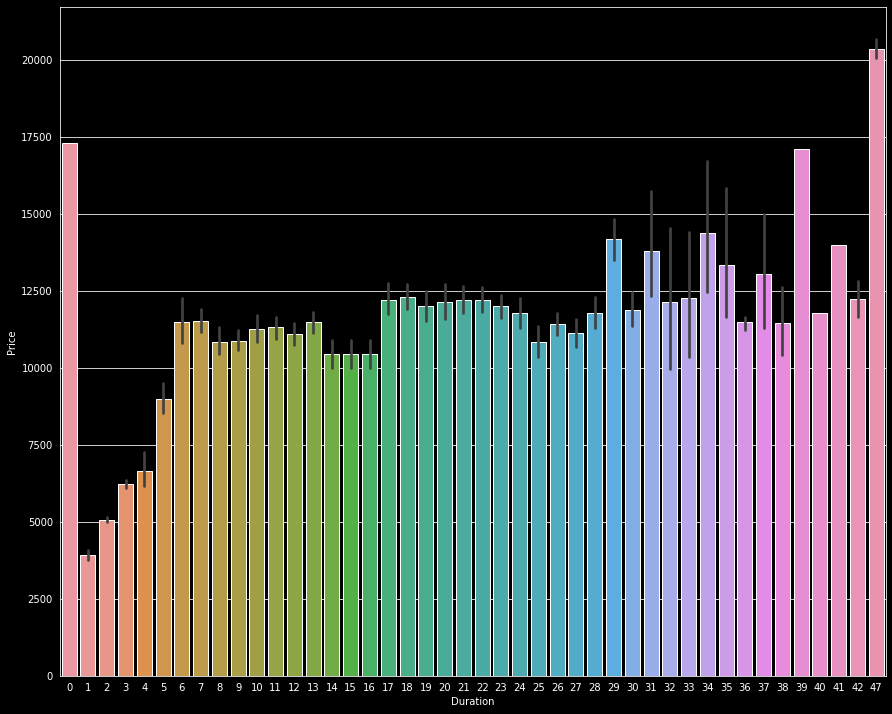

In [32]:
sns.barplot(x="Duration",y="Price",data=train)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

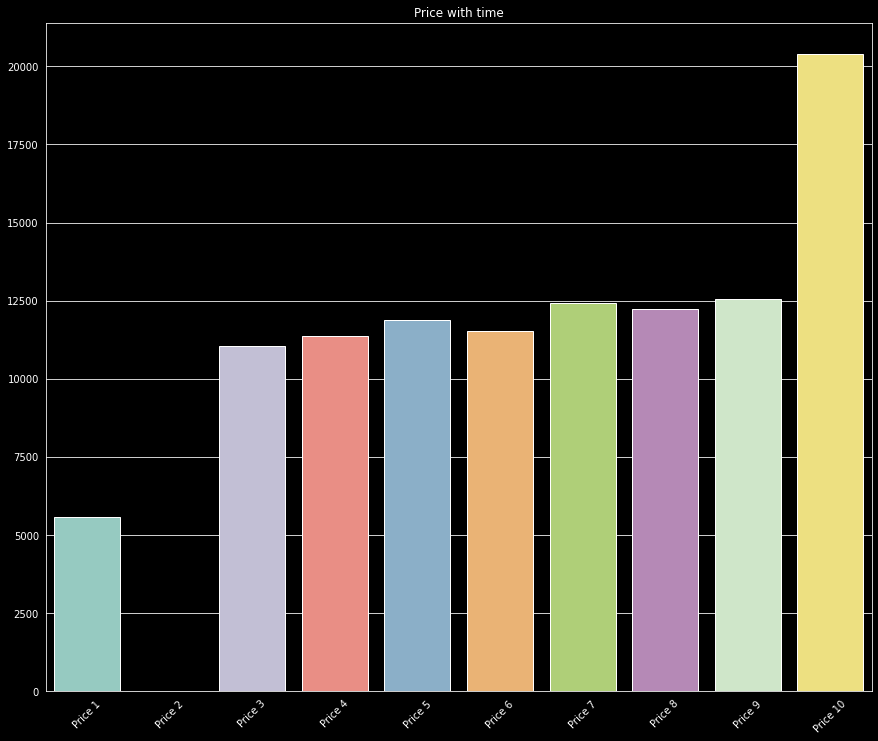

In [40]:
Price1=train["Price"][((train["Duration"]>=0) & (train["Duration"]<=5))]
Price2=train["Price"][((train.Duration <= 5) & (train.Duration >= 10))]
Price3=train["Price"][((train["Duration"]>=10) & (train["Duration"]<=15))]
Price4=train["Price"][((train["Duration"]>=15) & (train["Duration"]<=20))]
Price5=train["Price"][((train["Duration"]>=20) & (train["Duration"]<=25))]
Price6=train["Price"][((train["Duration"]>=25) & (train["Duration"]<=30))]
Price7=train["Price"][((train["Duration"]>=30) & (train["Duration"]<=35))]
Price8=train["Price"][((train["Duration"]>=35) & (train["Duration"]<=40))]
Price9=train["Price"][((train["Duration"]>=40) & (train["Duration"]<=45))]
Price10=train["Price"][((train["Duration"]>=45) & (train["Duration"]<=50))]

x=["Price 1","Price 2","Price 3","Price 4","Price 5","Price 6","Price 7","Price 8","Price 9","Price 10"]
y=[np.mean(Price1),np.mean(Price2),np.mean(Price3),np.mean(Price4),np.mean(Price5),np.mean(Price6),np.mean(Price7),np.mean(Price8),np.mean(Price9),np.mean(Price10)]

plt.title("Price with time")
sns.barplot(x=x,y=y)
plt.xticks(rotation=45)